In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/harrypottertextdataset/Harry Potter 5.txt
/kaggle/input/harrypottertextdataset/Harry Potter 2.txt
/kaggle/input/harrypottertextdataset/Harry Potter 7.txt
/kaggle/input/harrypottertextdataset/Harry Potter 1.txt
/kaggle/input/harrypottertextdataset/Harry Potter 4.txt
/kaggle/input/harrypottertextdataset/Harry Potter 6.txt
/kaggle/input/harrypottertextdataset/Harry Potter 3.txt
/kaggle/input/entity-annotated-corpus/ner.csv
/kaggle/input/entity-annotated-corpus/ner_dataset.csv


In [2]:
import pandas as pd
df = pd.read_csv("/kaggle/input/entity-annotated-corpus/ner.csv", encoding = "ISO-8859-1", error_bad_lines=False)
df.head()

b'Skipping line 281837: expected 25 fields, saw 34\n'


Unnamed: 0     lemma next-lemma next-next-lemma next-next-pos  \
0           0  thousand         of        demonstr           NNS   
1           1        of   demonstr            have           VBP   
2           2  demonstr       have           march           VBN   
3           3      have      march         through            IN   
4           4     march    through          london           NNP   

  next-next-shape next-next-word next-pos next-shape      next-word  ...  \
0       lowercase  demonstrators       IN  lowercase             of  ...   
1       lowercase           have      NNS  lowercase  demonstrators  ...   
2       lowercase        marched      VBP  lowercase           have  ...   
3       lowercase        through      VBN  lowercase        marched  ...   
4     capitalized         London       IN  lowercase        through  ...   

  prev-prev-lemma prev-prev-pos prev-prev-shape prev-prev-word   prev-shape  \
0      __start2__    __START2__        wildcard     __START2__     wildcard   
1      __start1__    __START1__        wildcard     __START1__  capitalized   
2        thousand           NNS     capitalized      Thousands    lowercase   
3              of            IN       lowercase             of    lowercase   
4        demonstr           NNS       lowercase  demonstrators    lowercase   

       prev-word sentence_idx        shape           word tag  
0     __START1__          1.0  capitalized      Thousands   O  
1      Thousands          1.0    lowercase             of   O  
2             of          1.0    lowercase  demonstrators   O  
3  demonstrators          1.0    lowercase           have   O  
4           have          1.0    lowercase        marched   O  

[5 rows x 25 columns]

In [3]:
data = df[['sentence_idx','word','tag']]

data.head(20)

sentence_idx           word    tag
0            1.0      Thousands      O
1            1.0             of      O
2            1.0  demonstrators      O
3            1.0           have      O
4            1.0        marched      O
5            1.0        through      O
6            1.0         London  B-geo
7            1.0             to      O
8            1.0        protest      O
9            1.0            the      O
10           1.0            war      O
11           1.0             in      O
12           1.0           Iraq  B-geo
13           1.0            and      O
14           1.0         demand      O
15           1.0            the      O
16           1.0     withdrawal      O
17           1.0             of      O
18           1.0        British  B-gpe
19           1.0         troops      O

In [4]:
df['tag'].value_counts()

O        889973
B-geo     37525
B-tim     20193
B-org     20184
I-per     17382
B-per     17011
I-org     16537
B-gpe     16392
I-geo      7409
I-tim      6298
B-art       434
B-eve       348
I-eve       297
I-art       280
I-gpe       229
B-nat       226
I-nat        76
Name: tag, dtype: int64

In [5]:
class SentenceGetter(object):
    
    def __init__(self, dataset):
        self.n_sent = 1
        self.dataset = dataset
        self.empty = False
        agg_func = lambda s: [(w, t) for w,t in zip(s["word"].values.tolist(),
                                                        s["tag"].values.tolist())]
        self.grouped = self.dataset.groupby("sentence_idx").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None
          
getter = SentenceGetter(data)
sentences = getter.sentences

In [6]:
print(sentences[1:3])

[[('Families', 'O'), ('of', 'O'), ('soldiers', 'O'), ('killed', 'O'), ('in', 'O'), ('the', 'O'), ('conflict', 'O'), ('joined', 'O'), ('the', 'O'), ('protesters', 'O'), ('who', 'O'), ('carried', 'O'), ('banners', 'O'), ('with', 'O'), ('such', 'O'), ('slogans', 'O'), ('as', 'O'), ('"', 'O'), ('Bush', 'B-per'), ('Number', 'O'), ('One', 'O'), ('Terrorist', 'O'), ('"', 'O'), ('and', 'O'), ('"', 'O'), ('Stop', 'O'), ('the', 'O'), ('Bombings', 'O'), ('.', 'O'), ('"', 'O'), ('Families', 'O'), ('of', 'O'), ('soldiers', 'O'), ('killed', 'O'), ('in', 'O'), ('the', 'O'), ('conflict', 'O'), ('joined', 'O'), ('the', 'O'), ('protesters', 'O'), ('who', 'O'), ('carried', 'O'), ('banners', 'O'), ('with', 'O'), ('such', 'O'), ('slogans', 'O'), ('as', 'O'), ('"', 'O'), ('Bush', 'B-per'), ('Number', 'O'), ('One', 'O'), ('Terrorist', 'O'), ('"', 'O'), ('and', 'O'), ('"', 'O'), ('Stop', 'O'), ('the', 'O'), ('Bombings', 'O'), ('.', 'O'), ('"', 'O')], [('They', 'O'), ('marched', 'O'), ('from', 'O'), ('the', 'O

In [7]:
from math import nan

words = list(set(data["word"].values))
n_words = len(words)

tags = []
for tag in set(data["tag"].values):
    if tag is nan or isinstance(tag, float):
        tags.append('unk')
    else:
        tags.append(tag)
n_tags = len(tags)


In [8]:
from future.utils import iteritems

word2idx = {w: i for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}
idx2tag = {v: k for k, v in iteritems(tag2idx)}


In [9]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

maxlen = max([len(s) for s in sentences])

X = [[word2idx[w[0]] for w in s] for s in sentences]
X = pad_sequences(maxlen=maxlen, sequences=X, padding="post",value=n_words - 1)

y = [[tag2idx[w[1]] for w in s] for s in sentences]
y = pad_sequences(maxlen=maxlen, sequences=y, padding="post", value=tag2idx["O"])
y = [to_categorical(i, num_classes=n_tags) for i in y]

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


Using TensorFlow backend.


In [10]:
# !pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-3jityzo6
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-3jityzo6
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-cp36-none-any.whl size=101065 sha256=c3ef085a1ac93ef3eb8145cd741ed8ae0c5924c3f01493360a27cd252f53ca00
  Stored in directory: /tmp/pip-ephem-wheel-cache-drl15ud4/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib


In [11]:
from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
import keras as k
from keras_contrib.layers import CRF

input = Input(shape=(140,))
word_embedding_size = 150

# Embedding Layer
model = Embedding(input_dim=n_words, output_dim=word_embedding_size, input_length=140)(input)

# BI-LSTM Layer
model = Bidirectional(LSTM(units=word_embedding_size, 
                           return_sequences=True, 
                           dropout=0.5, 
                           recurrent_dropout=0.5, 
                           kernel_initializer=k.initializers.he_normal()))(model)
model = LSTM(units=word_embedding_size * 2, 
             return_sequences=True, 
             dropout=0.5, 
             recurrent_dropout=0.5, 
             kernel_initializer=k.initializers.he_normal())(model)

# TimeDistributed Layer
model = TimeDistributed(Dense(n_tags, activation="relu"))(model)  

# CRF Layer
crf = CRF(n_tags)

out = crf(model)  # output
model = Model(input, out)

In [12]:
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

#Optimiser 
adam = k.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999)

# Compile model
model.compile(optimizer=adam, loss=crf.loss_function, metrics=[crf.accuracy, 'accuracy'])

model.summary()

# Saving the best model only
filepath="ner-bi-lstm-td-model-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Fit the best model
history = model.fit(X_train, np.array(y_train), batch_size=256, epochs=20, validation_split=0.1, verbose=1, callbacks=callbacks_list)



/opt/conda/lib/python3.6/site-packages/keras_contrib/layers/crf.py:346: UserWarning: CRF.loss_function is deprecated and it might be removed in the future. Please use losses.crf_loss instead.
  warnings.warn('CRF.loss_function is deprecated '
/opt/conda/lib/python3.6/site-packages/keras_contrib/layers/crf.py:353: UserWarning: CRF.accuracy is deprecated and it might be removed in the future. Please use metrics.crf_accuracy
  warnings.warn('CRF.accuracy is deprecated and it '


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 140)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 140, 150)          4525950   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 140, 300)          361200    
_________________________________________________________________
lstm_2 (LSTM)                (None, 140, 300)          721200    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 140, 18)           5418      
_________________________________________________________________
crf_1 (CRF)                  (None, 140, 18)           702       
Total params: 5,614,470
Trainable params: 5,614,470
Non-trainable params: 0
_________________________________________________

/opt/conda/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25326 samples, validate on 2815 samples
Epoch 1/20
25326/25326 [==============================] - 59s 2ms/step - loss: 0.4953 - crf_viterbi_accuracy: 0.9290 - accuracy: 0.0000e+00 - val_loss: 0.2116 - val_crf_viterbi_accuracy: 0.9663 - val_accuracy: 0.9663

Epoch 00001: val_accuracy improved from -inf to 0.96631, saving model to ner-bi-lstm-td-model-0.97.hdf5
Epoch 2/20
25326/25326 [==============================] - 55s 2ms/step - loss: 0.1829 - crf_viterbi_accuracy: 0.9674 - accuracy: 0.0000e+00 - val_loss: 0.1735 - val_crf_viterbi_accuracy: 0.9663 - val_accuracy: 0.9663

Epoch 00002: val_accuracy did not improve from 0.96631
Epoch 3/20
25326/25326 [==============================] - 55s 2ms/step - loss: 0.1638 - crf_viterbi_accuracy: 0.9674 - accuracy: 0.0000e+00 - val_loss: 0.1594 - val_crf_viterbi_accuracy: 0.9663 - val_accuracy: 0.9663

Epoch 00003: val_accuracy did not improve from 0.96631
Epoch 4/20
25326/25326 [==============================] - 55s 2ms/step - loss: 0.14

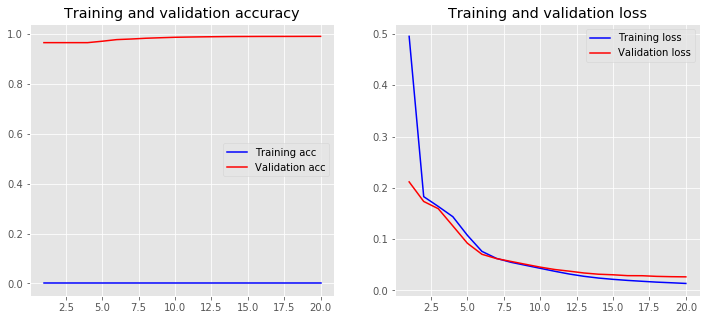

In [13]:
# Plot the graph 
plt.style.use('ggplot')

def plot_history(history):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(accuracy) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, accuracy, 'b', label='Training acc')
    plt.plot(x, val_accuracy, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history)

In [14]:
def pred2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            p_i = np.argmax(p)
            out_i.append(idx2tag[p_i])
        out.append(out_i)
    return out
test_pred = model.predict(X_test, verbose=1)   
pred_labels = pred2label(test_pred)
test_labels = pred2label(y_test)

7036/7036 [==============================] - 25s 4ms/step


In [15]:
# ! pip install seqeval

     |████████████████████████████████| 51kB 2.7MB/s eta 0:00:011
  Created wheel for seqeval: filename=seqeval-1.2.2-cp36-none-any.whl size=16172 sha256=92489c0594e4760027b2b8a7e5df46f2e00690e01d1862ecf75141999025ac2c
  Stored in directory: /root/.cache/pip/wheels/52/df/1b/45d75646c37428f7e626214704a0e35bd3cfc32eda37e59e5f
Successfully built seqeval


In [16]:
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report
print("F1-score: {:.1%}".format(f1_score(test_labels, pred_labels)))


F1-score: 78.8%


In [17]:
# ! pip install sklearn_crfsuite

     |████████████████████████████████| 747kB 4.5MB/s eta 0:00:01


In [18]:
from  sklearn_crfsuite.metrics import flat_classification_report  
report = flat_classification_report(y_pred=pred_labels, y_true=test_labels)
print(report)


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

       B-art       0.00      0.00      0.00        69
       B-eve       0.00      0.00      0.00        64
       B-geo       0.83      0.86      0.85      7595
       B-gpe       0.94      0.92      0.93      3242
       B-nat       0.00      0.00      0.00        45
       B-org       0.73      0.69      0.71      3927
       B-per       0.83      0.76      0.79      3378
       B-tim       0.90      0.87      0.88      3984
       I-art       0.00      0.00      0.00        38
       I-eve       0.00      0.00      0.00        40
       I-geo       0.77      0.78      0.77      1502
       I-gpe       0.00      0.00      0.00        53
       I-nat       0.00      0.00      0.00        14
       I-org       0.79      0.69      0.74      3150
       I-per       0.87      0.73      0.79      3433
       I-tim       0.85      0.68      0.75      1261
           O       1.00      1.00      1.00    953245

    accuracy              

In [19]:
TP = {}
TN = {}
FP = {}
FN = {}
for tag in tag2idx.keys():
    TP[tag] = 0
    TN[tag] = 0    
    FP[tag] = 0    
    FN[tag] = 0    

def accumulate_score_by_tag(gt, pred):
    """
    For each tag keep stats
    """
    if gt == pred:
        TP[gt] += 1
    elif gt != 'O' and pred == 'O':
        FN[gt] +=1
    elif gt == 'O' and pred != 'O':
        FP[gt] += 1
    else:
        TN[gt] += 1

In [20]:
for i, sentence in enumerate(X_test):
    y_hat = np.argmax(test_pred[0], axis=-1)
    gt = np.argmax(y_test[0], axis=-1)
    for idx, (w,pred) in enumerate(zip(sentence,y_hat)):
        accumulate_score_by_tag(idx2tag[gt[idx]],tags[pred])

In [21]:
for tag in tag2idx.keys():
    print(f'tag:{tag}')    
    print('\t TN:{:10}\tFP:{:10}'.format(TN[tag],FP[tag]))
    print('\t FN:{:10}\tTP:{:10}'.format(FN[tag],TP[tag]))    

tag:unk
	 TN:         0	FP:         0
	 FN:         0	TP:         0
tag:I-gpe
	 TN:         0	FP:         0
	 FN:         0	TP:         0
tag:B-nat
	 TN:         0	FP:         0
	 FN:         0	TP:         0
tag:B-eve
	 TN:         0	FP:         0
	 FN:         0	TP:         0
tag:B-tim
	 TN:         0	FP:         0
	 FN:         0	TP:         0
tag:B-org
	 TN:         0	FP:         0
	 FN:         0	TP:         0
tag:I-eve
	 TN:         0	FP:         0
	 FN:         0	TP:         0
tag:B-art
	 TN:         0	FP:         0
	 FN:         0	TP:         0
tag:I-nat
	 TN:         0	FP:         0
	 FN:         0	TP:         0
tag:B-gpe
	 TN:         0	FP:         0
	 FN:         0	TP:         0
tag:O
	 TN:         0	FP:         0
	 FN:         0	TP:    985040
tag:I-art
	 TN:         0	FP:         0
	 FN:         0	TP:         0
tag:B-geo
	 TN:         0	FP:         0
	 FN:         0	TP:         0
tag:I-tim
	 TN:         0	FP:         0
	 FN:         0	TP:         0
tag:I-per
	 TN:         0	

https://github.com/snehalnair/Named-Entity-Recognition/blob/master/NER.ipynb

In [10]:
data = pd.read_csv('/kaggle/input/entity-annotated-corpus/ner_dataset.csv', encoding= 'unicode_escape')
data.head()

Sentence #           Word  POS Tag
0  Sentence: 1      Thousands  NNS   O
1          NaN             of   IN   O
2          NaN  demonstrators  NNS   O
3          NaN           have  VBP   O
4          NaN        marched  VBN   O

In [11]:
data.shape

(1048575, 4)

In [12]:
from itertools import chain
def get_dict_map(data, token_or_tag):
    tok2idx = {}
    idx2tok = {}
    
    if token_or_tag == 'token':
        vocab = list(set(data['Word'].to_list()))
    else:
        vocab = list(set(data['Tag'].to_list()))
    
    idx2tok = {idx:tok for  idx, tok in enumerate(vocab)}
    tok2idx = {tok:idx for  idx, tok in enumerate(vocab)}
    return tok2idx, idx2tok


token2idx, idx2token = get_dict_map(data, 'token')
tag2idx, idx2tag = get_dict_map(data, 'tag')

In [13]:
data['Word_idx'] = data['Word'].map(token2idx)
data['Tag_idx'] = data['Tag'].map(tag2idx)

In [14]:
data.head()

Sentence #           Word  POS Tag  Word_idx  Tag_idx
0  Sentence: 1      Thousands  NNS   O      4721       14
1          NaN             of   IN   O     35094       14
2          NaN  demonstrators  NNS   O     27268       14
3          NaN           have  VBP   O     22029       14
4          NaN        marched  VBN   O     29599       14

In [15]:
data.isna().any()

Sentence #     True
Word          False
POS           False
Tag           False
Word_idx      False
Tag_idx       False
dtype: bool

In [16]:
data_fillna = data.fillna(method='ffill', axis=0)
data_group = data_fillna.groupby(['Sentence #'],as_index=False
                                )['Word', 'POS', 'Tag', 'Word_idx', 'Tag_idx'].agg(lambda x: list(x))

data_group.head()

Sentence #                                               Word  \
0      Sentence: 1  [Thousands, of, demonstrators, have, marched, ...   
1     Sentence: 10  [Iranian, officials, say, they, expect, to, ge...   
2    Sentence: 100  [Helicopter, gunships, Saturday, pounded, mili...   
3   Sentence: 1000  [They, left, after, a, tense, hour-long, stand...   
4  Sentence: 10000  [U.N., relief, coordinator, Jan, Egeland, said...   

                                                 POS  \
0  [NNS, IN, NNS, VBP, VBN, IN, NNP, TO, VB, DT, ...   
1  [JJ, NNS, VBP, PRP, VBP, TO, VB, NN, TO, JJ, J...   
2  [NN, NNS, NNP, VBD, JJ, NNS, IN, DT, NNP, JJ, ...   
3     [PRP, VBD, IN, DT, NN, JJ, NN, IN, NN, NNS, .]   
4  [NNP, NN, NN, NNP, NNP, VBD, NNP, ,, NNP, ,, J...   

                                                 Tag  \
0  [O, O, O, O, O, O, B-geo, O, O, O, O, O, B-geo...   
1  [B-gpe, O, O, O, O, O, O, O, O, O, O, O, O, O,...   
2  [O, O, B-tim, O, O, O, O, O, B-geo, O, O, O, O...   
3                  [O, O, O, O, O, O, O, O, O, O, O]   
4  [B-geo, O, O, B-per, I-per, O, B-tim, O, B-geo...   

                                            Word_idx  \
0  [4721, 35094, 27268, 22029, 29599, 24656, 1951...   
1  [24555, 3495, 10399, 3173, 16279, 14617, 26098...   
2  [26022, 3145, 8102, 31963, 15463, 1482, 15024,...   
3  [33725, 18553, 31046, 33765, 4080, 14915, 7817...   
4  [19021, 23158, 10481, 31725, 12691, 12888, 943...   

                                             Tag_idx  
0  [14, 14, 14, 14, 14, 14, 3, 14, 14, 14, 14, 14...  
1  [6, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14...  
2  [14, 14, 4, 14, 14, 14, 14, 14, 3, 14, 14, 14,...  
3       [14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14]  
4  [3, 14, 14, 5, 7, 14, 4, 14, 3, 14, 6, 14, 6, ...

In [17]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

Using TensorFlow backend.


In [18]:
def get_pad_train_test_val(data_group, data):
    n_token = len(list(set(data['Word'].to_list())))
    n_tag = len(list(set(data['Tag'].to_list())))
    
    tokens = data_group['Word_idx'].tolist()
    maxlen = max([len(s) for s in tokens])
    pad_tokens = pad_sequences(tokens, maxlen=maxlen, dtype='int32', padding='post', value= n_token - 1)
    
    tags = data_group['Tag_idx'].tolist()
    pad_tags = pad_sequences(tags, maxlen=maxlen, dtype='int32', padding='post', value= tag2idx["O"])
    
    n_tags = len(tag2idx)
    pad_tags = [to_categorical(i, num_classes=n_tags) for i in pad_tags]
    
    
    train_tokens, test_tokens, train_tags, test_tags = train_test_split(pad_tokens, pad_tags, test_size=0.1, train_size=0.9, random_state=2020)

    print(
        'train_tokens length:', len(train_tokens),
        '\ntest_tokens length:', len(test_tokens),
        '\ntrain_tags:', len(train_tags),
        '\ntest_tags:', len(test_tags)
    )
    
    return train_tokens, test_tokens, train_tags, test_tags

train_tokens, test_tokens, train_tags, test_tags = get_pad_train_test_val(data_group, data)

train_tokens length: 43163 
test_tokens length: 4796 
train_tags: 43163 
test_tags: 4796


In [19]:
for token, tag in zip(train_tokens[0], train_tags[0]):
    print('%s\t%s' % (token, tag))

8532	[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
10399	[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
11157	[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
25778	[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
16881	[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
33309	[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
14617	[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
16196	[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
30433	[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
8790	[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
16478	[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
8837	[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
3173	[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
29724	[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
11125	[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
18542	[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
7960	[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
27

In [20]:
import numpy as np
import tensorflow
from tensorflow.keras import Sequential, Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
from tensorflow.keras.utils import plot_model

# import keras as k

In [21]:
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)

In [22]:
input_dim = len(list(set(data['Word'].to_list())))+1
output_dim = 32
input_length = max([len(s) for s in data_group['Word_idx'].tolist()])
n_tags = len(tag2idx)
print('input_dim: ', input_dim, '\noutput_dim: ', output_dim, '\ninput_length: ', input_length, '\nn_tags: ', n_tags)

input_dim:  35179 
output_dim:  32 
input_length:  104 
n_tags:  17


In [23]:
def get_bilstm_lstm_model():
    model = Sequential()

    # Add Embedding layer
    model.add(Embedding(input_dim=input_dim, output_dim=output_dim, input_length=input_length))

    # Add bidirectional LSTM
    model.add(Bidirectional(LSTM(units=output_dim, return_sequences=True, dropout=0.2, recurrent_dropout=0.2), merge_mode = 'concat'))

    # Add LSTM
    model.add(LSTM(units=output_dim, return_sequences=True, dropout=0.5, recurrent_dropout=0.5))

    # Add timeDistributed Layer
    model.add(TimeDistributed(Dense(n_tags, activation="relu")))

    #Optimiser 
    # adam = k.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999)

    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    
    return model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 104, 32)           1125728   
_________________________________________________________________
bidirectional (Bidirectional (None, 104, 64)           16640     
_________________________________________________________________
lstm_1 (LSTM)                (None, 104, 32)           12416     
_________________________________________________________________
time_distributed (TimeDistri (None, 104, 17)           561       
Total params: 1,155,345
Trainable params: 1,155,345
Non-trainable params: 0
_________________________________________________________________


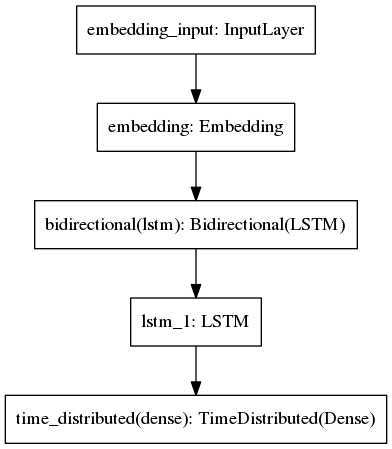

In [24]:
def train_model(X, y, model):
    loss = list()
    for _ in range(25):
        # fit model for one epoch on this sequence
        hist = model.fit(X, y, batch_size=1000, verbose=1, epochs=1, validation_split=0.2)
        loss.append(hist.history['loss'][0])
    return loss
model_bilstm_lstm = get_bilstm_lstm_model()
plot_model(model_bilstm_lstm)

In [25]:
results = pd.DataFrame()
results['with_add_lstm'] = train_model(train_tokens, np.array(train_tags), model_bilstm_lstm)

Train on 34530 samples, validate on 8633 samples
34530/34530 [==============================] - 24s 699us/sample - loss: 1.0822 - accuracy: 0.8916 - val_loss: 0.4660 - val_accuracy: 0.9679
Train on 34530 samples, validate on 8633 samples
34530/34530 [==============================] - 17s 506us/sample - loss: 0.4516 - accuracy: 0.9665 - val_loss: 0.3980 - val_accuracy: 0.9679
Train on 34530 samples, validate on 8633 samples
34530/34530 [==============================] - 18s 512us/sample - loss: 0.4023 - accuracy: 0.9675 - val_loss: 0.3289 - val_accuracy: 0.9679
Train on 34530 samples, validate on 8633 samples
34530/34530 [==============================] - 17s 501us/sample - loss: 0.3686 - accuracy: 0.9676 - val_loss: 0.3343 - val_accuracy: 0.9679
Train on 34530 samples, validate on 8633 samples
34530/34530 [==============================] - 17s 505us/sample - loss: 0.3479 - accuracy: 0.9676 - val_loss: 0.3103 - val_accuracy: 0.9679
Train on 34530 samples, validate on 8633 samples
34530/

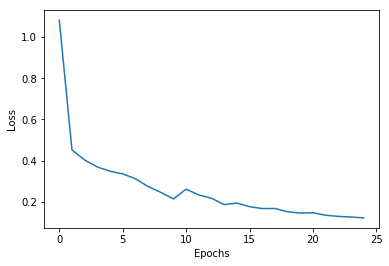

In [26]:
import matplotlib.pyplot as plt
plt.plot(results['with_add_lstm'])
plt.xlabel('Epochs');
plt.ylabel('Loss');

In [27]:
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

In [28]:
text = nlp(
    'Jim bought 300 shares of Acme Corp. in 2006. And producing an annotated block of text that \
    highlights the names of entities: [Jim]Person bought 300 shares of \
    [Acme Corp.]Organization in [2006]Time. In this example, a person name consisting \
    of one token, a two-token company name and a temporal expression have been detected \
    and classified.State-of-the-art NER systems for English produce near-human performance. \
    For example, the best system entering MUC-7 scored 93.39% of F-measure while human \
    annotators scored 97.60% and 96.95%.[1][2]')

In [29]:
for w in text.ents:
    print(w.text, w.label_)

Jim PERSON
300 CARDINAL
Acme Corp. ORG
2006 DATE
300 CARDINAL
Acme Corp.]Organization WORK_OF_ART
2006]Time CARDINAL
one CARDINAL
two CARDINAL
NER ORG
English LANGUAGE
MUC-7 CARDINAL
93.39% PERCENT
97.60% PERCENT


In [30]:
displacy.render(text, style = 'ent', jupyter=True)

In [31]:
spacy.explain('CARDINAL')

'Numerals that do not fall under another type'

In [44]:
from pathlib import Path
import codecs

In [46]:
path = '../input/harrypottertextdataset/'

In [47]:
book_name = 'Harry Potter'

In [50]:
book_list = os.listdir(path)
book_list

['Harry Potter 5.txt',
 'Harry Potter 2.txt',
 'Harry Potter 7.txt',
 'Harry Potter 1.txt',
 'Harry Potter 4.txt',
 'Harry Potter 6.txt',
 'Harry Potter 3.txt']

In [51]:
book_list = [i for i in book_list if i.find(book_name) >= 0]
book_list

['Harry Potter 5.txt',
 'Harry Potter 2.txt',
 'Harry Potter 7.txt',
 'Harry Potter 1.txt',
 'Harry Potter 4.txt',
 'Harry Potter 6.txt',
 'Harry Potter 3.txt']

In [52]:
novel = ''
novel

''

In [55]:
book_list.sort()

In [56]:
book_list

['Harry Potter 1.txt',
 'Harry Potter 2.txt',
 'Harry Potter 3.txt',
 'Harry Potter 4.txt',
 'Harry Potter 5.txt',
 'Harry Potter 6.txt',
 'Harry Potter 7.txt']

In [60]:
for i in book_list:
    with codecs.open(path+i, 'r', encoding='utf-8', errors='ignore') as f:
        data = f.read().replace('\r', ' ').replace('\n', ' ').replace("\'", "'")
        novel += ' ' + data

In [61]:
data

'         Harry Potter and the Deathly Hallows   By J. K. Rowling     \x0c   Chapter One   The Dark Lord Ascending       The two men appeared out of nowhere, a few yards apart in the narrow, moonlit   lane. For a second they stood quite still, wands directed at each other\'s chests; then,   recognizing each other, they stowed their wands beneath their cloaks and started walking   briskly in the same direction.   "News?" asked the taller of the two.   "The best," replied Severus Snape.   The lane was bordered on the left by wild, low-growing brambles, on the right by a high,   neatly manicured hedge. The men\'s long cloaks flapped around their ankles as they   marched.   "Thought I might be late," said Yaxley, his blunt features sliding in and out of sight as   the branches of overhanging trees broke the moonlight. "It was a little trickier than I   expected. But I hope he will be satisfied. You sound confident that your reception will be   good?"   Snape nodded, but did not elaborate. 

In [62]:
novel

' Harry Potter and the Sorcerer\'s Stone  CHAPTER ONE  THE BOY WHO LIVED  Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you\'d expect to be involved in anything strange or mysterious, because they just didn\'t hold with such nonsense.  Mr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere.  The Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it. They didn\'t think they could bear it if anyone found out about the Potter

In [67]:
text = nlp(novel[:100000])

In [68]:
text

 Harry Potter and the Sorcerer's Stone  CHAPTER ONE  THE BOY WHO LIVED  Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you'd expect to be involved in anything strange or mysterious, because they just didn't hold with such nonsense.  Mr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere.  The Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it. They didn't think they could bear it if anyone found out about the Potters. Mr

In [69]:
for w in text.ents:
    print(w.text, w.label_)

Harry Potter PERSON
CHAPTER ORG
THE BOY WHO LIVED PRODUCT
Dursley PERSON
number four CARDINAL
Privet Drive GPE
Dursley PERSON
Grunnings ORG
Dursley PERSON
Dursleys PERSON
Dudley PERSON
Dursleys PERSON
Potters ORG
Potter PERSON
Dursley PERSON
several years DATE
Dursley PERSON
Potters ORG
Potters ORG
Potters WORK_OF_ART
Dudley GPE
Dursley PERSON
Tuesday DATE
Dursley PERSON
Dursley PERSON
Dudley PERSON
Dursley PERSON
Dursley PERSON
Dudley PERSON
Dudley PERSON
Dursley PERSON
number four CARDINAL
first ORDINAL
second ORDINAL
Dursley PERSON
Privet Drive FAC
Dursley PERSON
Dursley PERSON
Privet Drive PERSON
Dursley PERSON
that day DATE
Dursley PERSON
Dursley PERSON
Dursley PERSON
a few minutes later TIME
Dursley PERSON
Grunnings ORG
Dursley PERSON
ninth ORDINAL
that morning TIME
Dursley PERSON
five CARDINAL
baker PERSON
The Potters WORK_OF_ART
Harry PERSON
Dursley PERSON
Harry PERSON
Harry PERSON
Harvey ORG
Harold PERSON
Dursley PERSON
that afternoon TIME
five o'clock TIME
a few seconds TIME


In [70]:
displacy.render(text, style = 'ent', jupyter=True)